In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import pydicom
import numpy as np
import scipy.stats

In [2]:
df = pd.read_pickle('/home/maltesepoodle/datasets/rsna/dicom_meta_train.pickle')
# drop columns with missing data
df.dropna(axis=1, inplace=True)
df.head()

,BraTS21ID,dataset,type,dicom_src,AccessionNumber,BitsAllocated,BitsStored,Columns,HighBit,ImageOrientationPatient,...,SeriesNumber,SliceThickness,SpacingBetweenSlices,SpecificCharacterSet,StudyInstanceUID,TransferSyntaxUID,is_original_encoding,is_implicit_VR,is_little_endian,timestamp
0,00494,train,T1w,./train/00494/T1w/Image-97.dcm,00494,16,16,256,15,"[0.99821, 0.05832, -0.01312, -0.05974, 0.96542...",...,4,1.0,1.0,ISO_IR 100,1.2.826.0.1.3680043.8.498.11323756179976975702...,1.2.840.10008.1.2,True,True,True,1.624968e+09
1,00494,train,T1w,./train/00494/T1w/Image-118.dcm,00494,16,16,256,15,"[0.99821, 0.05832, -0.01312, -0.05974, 0.96542...",...,4,1.0,1.0,ISO_IR 100,1.2.826.0.1.3680043.8.498.11323756179976975702...,1.2.840.10008.1.2,True,True,True,1.624968e+09
2,00494,train,T1w,./train/00494/T1w/Image-91.dcm,00494,16,16,256,15,"[0.99821, 0.05832, -0.01312, -0.05974, 0.96542...",...,4,1.0,1.0,ISO_IR 100,1.2.826.0.1.3680043.8.498.11323756179976975702...,1.2.840.10008.1.2,True,True,True,1.624968e+09
3,00494,train,T1w,./train/00494/T1w/Image-67.dcm,00494,16,16,256,15,"[0.99821, 0.05832, -0.01312, -0.05974, 0.96542...",...,4,1.0,1.0,ISO_IR 100,1.2.826.0.1.3680043.8.498.11323756179976975702...,1.2.840.10008.1.2,True,True,True,1.624968e+09
4,00494,train,T1w,./train/00494/T1w/Image-11.dcm,00494,16,16,256,15,"[0.99821, 0.05832, -0.01312, -0.05974, 0.96542...",...,4,1.0,1.0,ISO_IR 100,1.2.826.0.1.3680043.8.498.11323756179976975702...,1.2.840.10008.1.2,True,True,True,1.624968e+09


In [3]:
df.columns

Index(['BraTS21ID', 'dataset', 'type', 'dicom_src', 'AccessionNumber',
       'BitsAllocated', 'BitsStored', 'Columns', 'HighBit',
       'ImageOrientationPatient', 'ImagePositionPatient', 'ImageType',
       'InstanceNumber', 'Modality', 'PatientID', 'PatientName',
       'PatientPosition', 'PhotometricInterpretation', 'PixelRepresentation',
       'PixelSpacing', 'RescaleIntercept', 'RescaleSlope', 'RescaleType',
       'Rows', 'SOPClassUID', 'SOPInstanceUID', 'SamplesPerPixel',
       'SeriesDescription', 'SeriesInstanceUID', 'SeriesNumber',
       'SliceThickness', 'SpacingBetweenSlices', 'SpecificCharacterSet',
       'StudyInstanceUID', 'TransferSyntaxUID', 'is_original_encoding',
       'is_implicit_VR', 'is_little_endian', 'timestamp'],
      dtype='object')

In [4]:
unhashable = [] # columns with unhashable d-type
unif = []       # columns with only 1 unique value 
nonunif =[]     # columns witn multiple unique values

for c in df.columns:
    # bin columns
    try:
        nunique = df[c].nunique()
        if nunique == 1:
            unif.append(c)
        else:
            nonunif.append(c)
        print(f'{c}: {nunique}')
    # catch unhashable exception
    except Exception:
        unhashable.append(c)
        print(f'{c}: unhashable')

BraTS21ID: 585
dataset: 1
type: 4
dicom_src: 348641
AccessionNumber: 585
BitsAllocated: 1
BitsStored: 1
Columns: 36
HighBit: 1
ImageOrientationPatient: unhashable
ImagePositionPatient: unhashable
ImageType: unhashable
InstanceNumber: 516
Modality: 1
PatientID: 585
PatientName: 585
PatientPosition: 1
PhotometricInterpretation: 1
PixelRepresentation: 2
PixelSpacing: unhashable
RescaleIntercept: 1
RescaleSlope: 1
RescaleType: 1
Rows: 14
SOPClassUID: 1
SOPInstanceUID: 348641
SamplesPerPixel: 1
SeriesDescription: 4
SeriesInstanceUID: 2340
SeriesNumber: 102
SliceThickness: 21
SpacingBetweenSlices: 1
SpecificCharacterSet: 2
StudyInstanceUID: 585
TransferSyntaxUID: 1
is_original_encoding: 1
is_implicit_VR: 1
is_little_endian: 1
timestamp: 3057


In [5]:
ndf = df.drop(labels=[*unif], axis=1)
ndf.drop_duplicates(subset='BraTS21ID', inplace=True)
ndf.head()

,BraTS21ID,type,dicom_src,AccessionNumber,Columns,ImageOrientationPatient,ImagePositionPatient,ImageType,InstanceNumber,PatientID,...,PixelSpacing,Rows,SOPInstanceUID,SeriesDescription,SeriesInstanceUID,SeriesNumber,SliceThickness,SpecificCharacterSet,StudyInstanceUID,timestamp
0,00494,T1w,./train/00494/T1w/Image-97.dcm,00494,256,"[0.99821, 0.05832, -0.01312, -0.05974, 0.96542...","[-122.151, -152.233, 17.2954]","[DERIVED, SECONDARY]",97,00494,...,"[1, 1]",256,1.2.826.0.1.3680043.8.498.10424345840730562000...,T1w,1.2.826.0.1.3680043.8.498.25899292053474600740...,4,1.0,ISO_IR 100,1.2.826.0.1.3680043.8.498.11323756179976975702...,1.624968e+09
1005,00441,T1w,./train/00441/T1w/Image-11.dcm,00441,208,"[1, -2.017339e-10, -3.70251e-11, 2.051034e-10,...","[-95.824130081875, -151.77083730155, -9.347570...","[DERIVED, SECONDARY]",11,00441,...,"[0.8984375, 0.8984375]",256,1.2.826.0.1.3680043.8.498.11120983308605952081...,T1w,1.2.826.0.1.3680043.8.498.89911326591802839386...,3,4.0,ISO_IR 100,1.2.826.0.1.3680043.8.498.89613891924650256089...,1.624968e+09
1136,00661,T1w,./train/00661/T1w/Image-97.dcm,00661,256,"[1, -0, 0, -0, 1, 0]","[-140.5, -151.725, 12.8339]","[DERIVED, SECONDARY]",97,00661,...,"[1, 1]",256,1.2.826.0.1.3680043.8.498.15863470377377938737...,T1w,1.2.826.0.1.3680043.8.498.93604630726595422863...,4,1.0,ISO_IR 100,1.2.826.0.1.3680043.8.498.51762479845439340669...,1.624970e+09
2071,00426,T1w,./train/00426/T1w/Image-118.dcm,00426,192,"[0.9999984769134, -0.0017453283007, 0, 0.00174...","[-99.192854829332, -149.34711037896, 14.358484...","[DERIVED, SECONDARY]",118,00426,...,"[0.9765625, 0.9765625]",256,1.2.826.0.1.3680043.8.498.12969174177422531983...,T1w,1.2.826.0.1.3680043.8.498.42970356710892859574...,2,1.0,ISO_IR 100,1.2.826.0.1.3680043.8.498.73899051311026660496...,1.624968e+09
2580,00035,T1w,./train/00035/T1w/Image-11.dcm,00035,512,"[1, -0, 0, -0, 0.999334, 0.036489]","[-119.766, -142.23, -22.6306]","[DERIVED, SECONDARY]",11,00035,...,"[0.468800008296967, 0.468800008296967]",512,1.2.826.0.1.3680043.8.498.72961373068366135750...,T1w,1.2.826.0.1.3680043.8.498.10375337104574798417...,13,5.0,ISO_IR 100,1.2.826.0.1.3680043.8.498.61319823275640060929...,1.624966e+09


In [6]:
ndf["OrientationRounded"] = ndf["ImageOrientationPatient"].apply(np.round)

In [7]:
sdf = ndf[["BraTS21ID", "type", "ImageOrientationPatient", "SliceThickness", "PixelSpacing"]]
sdf.head()

,BraTS21ID,type,ImageOrientationPatient,SliceThickness,PixelSpacing
0,00494,T1w,"[0.99821, 0.05832, -0.01312, -0.05974, 0.96542...",1.0,"[1, 1]"
1005,00441,T1w,"[1, -2.017339e-10, -3.70251e-11, 2.051034e-10,...",4.0,"[0.8984375, 0.8984375]"
1136,00661,T1w,"[1, -0, 0, -0, 1, 0]",1.0,"[1, 1]"
2071,00426,T1w,"[0.9999984769134, -0.0017453283007, 0, 0.00174...",1.0,"[0.9765625, 0.9765625]"
2580,00035,T1w,"[1, -0, 0, -0, 0.999334, 0.036489]",5.0,"[0.468800008296967, 0.468800008296967]"


In [8]:
def det_orientation(v):
    """ 
    converts real-valued patient orientation tuple to a textual orientation label
    
    scraped and modified from this discussion: 
    https://www.kaggle.com/davidbroberts/determining-mr-image-planes/notebook?fbclid=IwAR3K2h5vcGrt1EZqV23ZyhKwgGa3-k12wL976AdZyW8VG5LMeyyZk4Z1t14
    """
    v = np.round(v).astype(int)
    row_x = v[0]
    row_y = v[1]
    col_x = v[3]
    col_y = v[4]
    
    if row_x == 1 and row_y == 0 and col_x == 0 and col_y == 0:
        return "Coronal"

    if row_x == 0 and row_y == 1 and col_x == 0 and col_y == 0:
        return "Sagittal"

    if row_x == 1 and row_y == 0 and col_x == 0 and col_y == 1:
        return "Axial"

    return "Unknown"

# construct orientation label column
sdf["orientationLabel"] = sdf["ImageOrientationPatient"].apply(det_orientation)
# convert dicom tuple to float tuple
sdf["ImageOrientationPatient"] = sdf["ImageOrientationPatient"].apply(np.asarray)
sdf["PixelSpacing"] = sdf["PixelSpacing"].apply(np.asarray)
sdf.head()

/home/maltesepoodle/anaconda3/envs/rsna/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,BraTS21ID,type,ImageOrientationPatient,SliceThickness,PixelSpacing,orientationLabel
0,00494,T1w,"[0.99821, 0.05832, -0.01312, -0.05974, 0.96542...",1.0,"[1.0, 1.0]",Axial
1005,00441,T1w,"[1.0, -2.017339e-10, -3.70251e-11, 2.051034e-1...",4.0,"[0.8984375, 0.8984375]",Axial
1136,00661,T1w,"[1.0, -0.0, 0.0, -0.0, 1.0, 0.0]",1.0,"[1.0, 1.0]",Axial
2071,00426,T1w,"[0.9999984769134, -0.0017453283007, 0.0, 0.001...",1.0,"[0.9765625, 0.9765625]",Axial
2580,00035,T1w,"[1.0, -0.0, 0.0, -0.0, 0.999334, 0.036489]",5.0,"[0.468800008296967, 0.468800008296967]",Axial


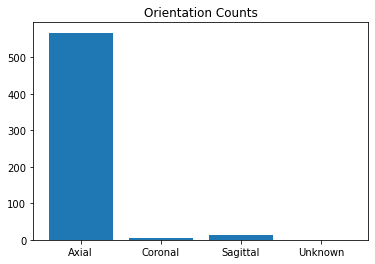

In [9]:
# plot image plane distribution
ori_counts = [
    len(sdf[sdf["orientationLabel"] == "Axial"]),
    len(sdf[sdf["orientationLabel"] == "Coronal"]),
    len(sdf[sdf["orientationLabel"] == "Sagittal"]),
    len(sdf[sdf["orientationLabel"] == "Unknown"])
]

plane_labels = ["Axial", "Coronal", "Sagittal", "Unknown"]
plt.bar(plane_labels, ori_counts)
plt.title("Orientation Counts")
plt.show()

 mean: 2.578461538583804, std: 1.8892808812112276, kurtosis: -1.748173326153838, skew: 0.45508920438860084


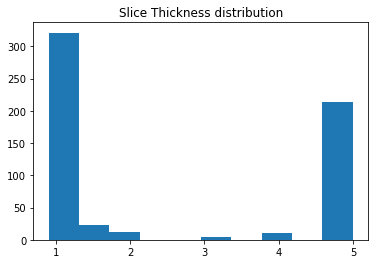

In [10]:
# get summary stats
thicknesses = np.asarray(sdf["SliceThickness"])
thickness_mean = np.mean(thicknesses)
thickness_std = np.std(thicknesses)
thickness_kurtosis = scipy.stats.kurtosis(thicknesses)
thickness_skew = scipy.stats.skew(thicknesses)
print(f' mean: {thickness_mean}, std: {thickness_std}, kurtosis: {thickness_kurtosis}, skew: {thickness_skew}')



# show thickness distribution 
plt.hist(sdf["SliceThickness"])
plt.title("Slice Thickness distribution")
plt.show()

 mean: 0.7632634586248642, std: 0.24567337567912495, kurtosis: -1.8050488834466287, skew: -0.28511102199865485


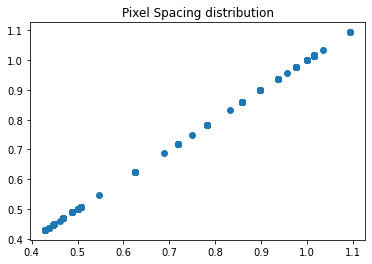

In [11]:
# get summary stats
spacing_x = sdf["PixelSpacing"].apply(lambda x: x[0])
spacing_y = sdf["PixelSpacing"].apply(lambda x: x[1])
spacing_x_mean = np.mean(spacing_x)
spacing_x_std = np.std(spacing_x)
spacing_x_kurtosis = scipy.stats.kurtosis(spacing_x)
spacing_x_skew = scipy.stats.skew(spacing_x)
# apparently all tuples have repeat dimensions so ill exclude y stats
print(f' mean: {spacing_x_mean}, std: {spacing_x_std}, kurtosis: {spacing_x_kurtosis}, skew: {spacing_x_skew}')
#
plt.scatter(spacing_x, spacing_y)
plt.title("Pixel Spacing distribution")
plt.show()